# Figures and Tables of Boursiac et al. 2022

- The purpose of this notebook is to reproduce most of the figures and tables of the paper: Yann Boursiac, Christophe Pradal, Fabrice Bauget, Mikaël Lucas, Stathis Delivorias, Christophe Godin, Christophe Maurel, Phenotyping and modeling of root hydraulic architecture reveal critical determinants of axial water transport, Plant Physiology, 2022;, kiac281, https://doi.org/10.1093/plphys/kiac281
- The main parameters are pass to the python scripts via a yaml file by command line
- the scripts may have some command line arguments, for example: '-o' to give the name of an ouput file when it may have one, '-op' to specify if parameters adjustment must be performed, etc. 
- due to very long run time, especially for the adjustment on cut and flow experiments, some figures are simply from csv files containing results
- however an example, figure 2-B, is given with a reasonable run time of about 20 minutes, other adjustment may then be tried by changing the architecture file name in the yaml file
- still to get reasonable run times, some shortest sets of data have been used (e.i. for Figure 5 and supplemental figure 8), but the full set may be used by uncommenting a line in the python script)

**Remark:** this is the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022 where results were obtained with a python 2 version. That may explain slightly different results .

In [1]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../../src'])
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#plt.ion()
# to display inline plots in the notebook
%matplotlib inline
# to be able to use the plantGL viewer in 3D
%gui qt

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:58:50) 
[GCC 10.3.0] on linux


### Figure 1-B:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root
- '--prop' argument allows to specify the property to display, here the order of the root is proposed to reflect the paper's figure. But other properties may be displayed as, for example: j the radial flux, J_out the axial flux, psi_in the hydrostatic pressure inside the xylem vessels.

plant-01.txt 1.0


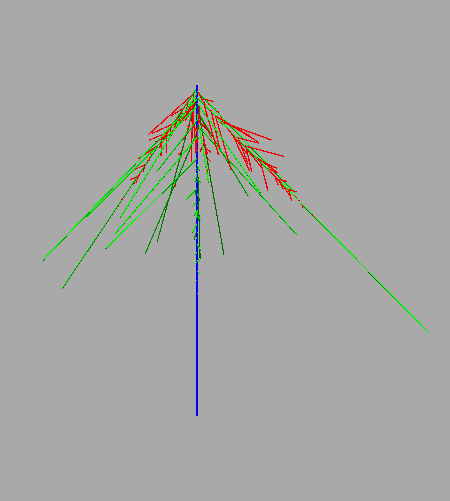

In [2]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-1B.yml --prop order

### Figure 2-A

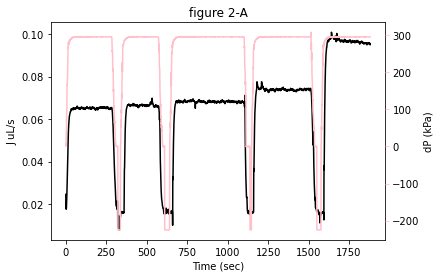

In [3]:
draw = pd.read_csv("data_figures/fig_2-A.csv", sep = ';')
fig = {}
ax5 = {}
ax6 = {}

fig = plt.figure()
ax5 = fig.add_subplot(111, label = "1")
draw.plot.line('Time (sec)', 'FLOW (?L.s-1)', color = 'black', ax = ax5)
ax5.set_title('figure 2-A')
ax5.set_ylabel('J uL/s')
ax6 = fig.add_subplot(111, label = "2", frame_on = False)
ax5.get_legend().remove()
draw.plot.line('Time (sec)', 'Pressure (kPa)', ax = ax6, color = 'pink')
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('dP (kPa)')
ax6.get_xaxis().set_visible(False)
ax6.tick_params(axis = 'y', color = "pink")
ax6.get_legend().remove()

### Figure 2-B: 
- run the adjustment of K and k see file parameters_fig-2-B.yml for the initial guesses of these parameters
- run time is around 20 minutes
- the '-op' argument allows to run the adjustment of the parameters K and k. Without this argument, a direct simulation with parameter values from parameters_fig-2-B.yml is run
- add '-o' as argument followed by a file name to save results in a csv

Simulation runs:  1
#############################
finished minimize ax, ar       fun: 4.8828008046912096e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 9.02094015e-06, -6.94380674e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([0.61020848, 5.7837016 ])
*******************************************************************************


/home/fabrice/miniconda2/envs/hydroroot39/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


finished minimize Kx      fun: 6.945937548233918e-10
     jac: array([-5.90800684e-05, -1.71418864e-04, -2.71816317e-04, -7.61970134e-04,
       -9.92031455e-04, -2.77793934e-04, -1.11403983e-04, -8.61957204e-04,
       -2.27564250e-04])
 message: 'Optimization terminated successfully'
    nfev: 253
     nit: 24
    njev: 24
  status: 0
 success: True
       x: array([0.00047371, 0.00019327, 0.00052036, 0.0003354 , 0.00046673,
       0.0024571 , 0.00343671, 0.00274265, 0.00127265])
Simu,  601.5049667084518 1.3327101531260848e-10 601.9238958820997 dk0 =  0.17550165253334504 dKx =  3.5815476958462954e-06
finished minimize Kx      fun: 1.0235507517735802e-10
     jac: array([-3.34248816e-05, -2.14819139e-05,  1.49795231e-05,  2.73097200e-05,
       -2.85809820e-04, -1.19857727e-04, -3.73311087e-05, -1.57034561e-04,
       -4.76678046e-05])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.00047375, 0.0001932

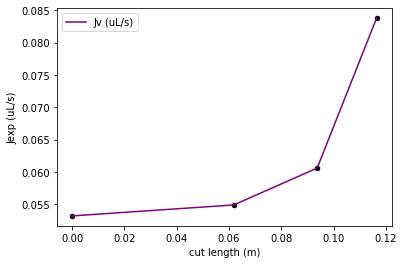

In [15]:
%run adjustment_K_and_k.py parameters_fig-2-B.yml -op

### Figure 2-C
- Because the total run time of the 10 adjustments is high (at least 20 min per plant) only the plot of the final results is displayed from a csv file
- however the user may reproduce them by changing the input_file name in parameters_fig-2-B.yml keeping the same initial guesses for k and K. These files are located in the folder data and contain the following string: 160316#2, 2020-01-19-9h06, 15012020-1045, 200219-ybfb-col, 200619-ybfb-col-1, 200619-ybfb-col-2, 200702-ybfb-col-1, 200703-ybfb-col-2, 200703-ybfb-col-3, 200724-ybfb-col-1

Text(0.5, 1.0, 'fig-2-C')

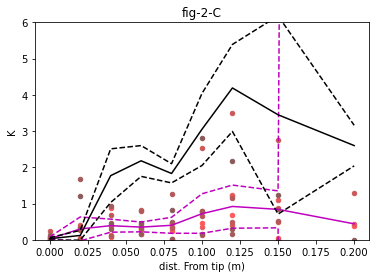

In [4]:
draw = pd.read_csv("data_figures/fig_2-C.csv", sep = ',', dtype = 'float')
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',color='m')
draw.plot('x K median', 'median -t*SE', color='m', ax=ax, style='--')
draw.plot('x K median', 'median + t*SE', color='m', ax=ax, style='--')
for i in range(0,20,2):
    color = (1.0-float(i)/40.0,0.35,0.35)
    draw.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.set_ylim(0.0, 6.0)
draw.plot('dist. From tip (m)', 'K lowess from Poiseuille\'s law on xylem', color='k', ax=ax)
draw.plot('dist. From tip (m)', 'Unnamed: 31', color='k', ax=ax, style='--')
draw.plot('dist. From tip (m)', 'Unnamed: 32', color='k', ax=ax, style='--')
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_title('fig-2-C')

### Figure 2-D

Text(0.5, 1.0, 'fig-2-D')

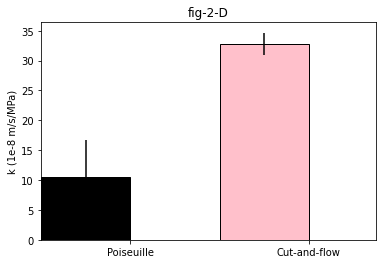

In [5]:
barwidth = 0.4
cut_n_flow = [9.86, 47.68, 71.43, 21.97, 60.15, 34.16, 10.19, 23.42, 26.62, 22.17]
se1 = np.std(cut_n_flow)/np.sqrt(len(cut_n_flow))
poiseuille = [3.39, 7.08, 8.7, 5.59, 13.12, 8.3, 19.22, 22.13, 12.76, 4.03]
se2 = np.std(poiseuille)/np.sqrt(len(poiseuille))
plt.bar(0.2, np.mean(poiseuille), width = barwidth, color = 'black', edgecolor = 'black', yerr=se1, label = 'poiseuille')
plt.bar(1.0, np.mean(cut_n_flow), width = barwidth, color = 'pink', edgecolor = 'black', yerr=se2, label = 'cut_n_flow')
plt.xlim(0,1.5)
plt.xticks([0.4, 1.2], ['Poiseuille', 'Cut-and-flow'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-2-D')

### Table 1:
- add argument '-o' followed by a file name to save results to a csv file

In [6]:
%run simulation_table-1.py parameters_table-1.yml

Simulation runs:  10
#############################
plant-10.txt          plant  total length (m)  surface (m2)  k (10-8 m/s/MPa)
0  plant-01.txt            1.6260      0.000463          3.393467
1  plant-02.txt            1.8761      0.000518          7.081622
2  plant-03.txt            1.5992      0.000448          8.699297
3  plant-04.txt            0.7099      0.000220          5.586774
4  plant-05.txt            1.8824      0.000510         13.124087
5  plant-06.txt            1.1174      0.000336          8.298469
6  plant-07.txt            2.1262      0.000603         19.224790
7  plant-08.txt            2.1082      0.000605         22.132164
8  plant-09.txt            1.1336      0.000360         12.764829
9  plant-10.txt            0.7824      0.000259          4.029486


<Figure size 432x288 with 0 Axes>

### Figure 3-A and 3-B

Text(0.5, 1.0, 'fig-3-B')

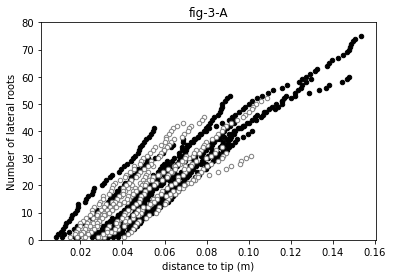

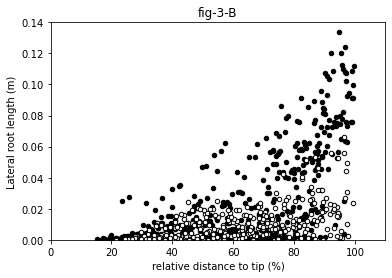

In [6]:
df3a = pd.read_csv("data_figures/fig-3-A.csv", sep = ',', dtype = 'float')
df3a.iloc[:,range(0,43,2)]=df3a.iloc[:,range(0,43,2)]/1000
ax = df3a.plot.scatter(0,1,marker='o',color='black',edgecolor ='black')
for i in range(2,26,2):
    df3a.plot.scatter(i,i+1,marker='o',color='black',edgecolor ='black',ax=ax)
for i in range(26,43,2):
    df3a.plot.scatter(i,i+1,marker='o',color='white',edgecolor ='grey',ax=ax)
# ax.set_xlim(0,0.16)
ax.set_ylim(0,80)
ax.set_ylabel('Number of lateral roots')
ax.set_xlabel('distance to tip (m)')
ax.set_title('fig-3-A')
df3b = pd.read_csv("data_figures/fig-3-B.csv", sep = ',', dtype = 'float')
df3b.iloc[:,[0,2]]=df3b.iloc[:,[0,2]]/1000
ax = df3b.plot.scatter(1,0,marker='o',color='black',edgecolor ='black')
df3b.plot.scatter(3,2,marker='o',color='white',edgecolor ='black',ax=ax)
ax.set_xlim(0,110)
ax.set_ylim(0,0.14)
ax.set_ylabel('Lateral root length (m)')
ax.set_xlabel('relative distance to tip (%)')
ax.set_title('fig-3-B')

### Figure 3-C
- see end of the script simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

**Remark:** this is the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022 where results were obtained with a python 2 version. That may explain slightly different results .

10318687 1.0


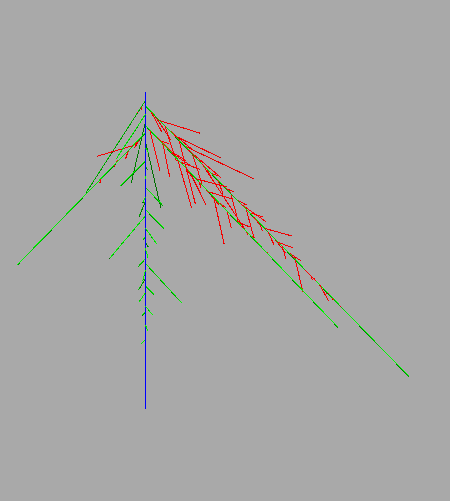

12999162 1.0


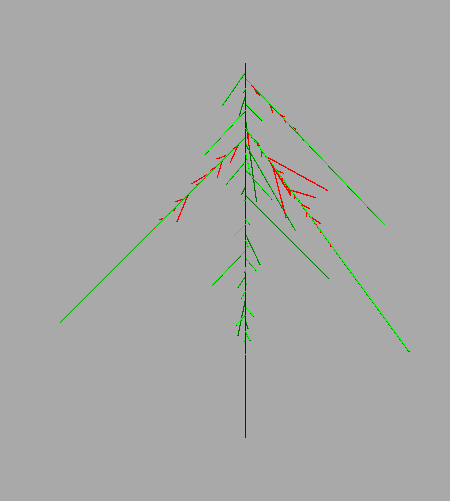

70180638 1.0


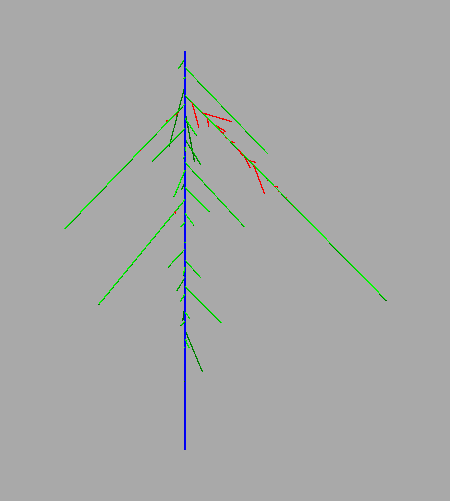

<Figure size 432x288 with 0 Axes>

In [7]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-3C.yml --prop order

### Figure 4-A

Text(0.5, 1.0, 'fig-4-A')

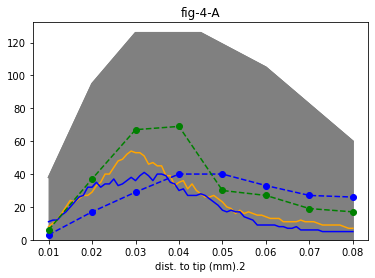

In [25]:
df4a = pd.read_csv("data_figures/fig-4-A.csv", sep = ',', dtype = 'float')
df4a.iloc[:,[0,3,6]]=df4a.iloc[:,[0,3,6]]/1e3
ax=df4a.plot(0,'all intercepts 1',color='orange')
df4a.plot(0,'all intercepts 2',color='blue',ax=ax)
df4a.plot(3,'discrete plant 3',color='blue',style='--',marker='o',ax=ax)
df4a.plot(3,'discrete plant 4',color='green',style='--',marker='o',ax=ax)
df4a.plot(6,'max sim',color='grey',ax=ax)
df4a.plot.area(6,'max sim',ax=ax,color='grey')
ax.legend().remove()
ax.set_title('fig-4-A')

### Figure 4-B

Text(0.5, 1.0, 'fig-4-B')

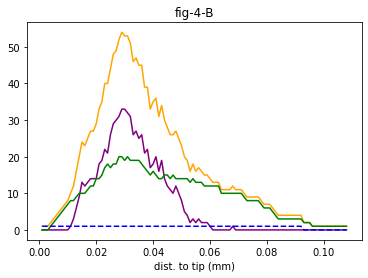

In [26]:
df4b = pd.read_csv("data_figures/fig-4-B.csv", sep = ',')
df4b.iloc[:,[0]]/=1e3
ax=df4b.plot(0,'all intercepts',color='orange')
df4b.plot(0,'intercepts order 2',color='purple',ax=ax)
df4b.plot(0,'intercepts order 1',color='green',ax=ax)
df4b.plot(0,'intercepts order 0',color='blue',style='--',ax=ax)
ax.legend().remove()
ax.set_title('fig-4-B')

### Figure 4-C

Text(0.5, 1.0, 'fig-4-C')

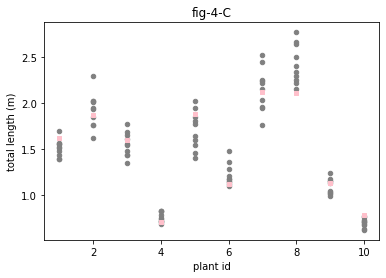

In [27]:
df4c = pd.read_csv("data_figures/fig-4-C.csv", sep = ',')
ax=df4c.plot.scatter('simulated plant id','total length simulated (m)',color='grey')
df4c.plot.scatter('plant id','total length (m)',color='pink',marker='s',edgecolor='pink',ax=ax)
ax.set_title('fig-4-C')

### Figure 5 and supplemental figure 8:
- the set of generated architecture has 9520 records, to reduce the run time the data set can be read every nth records using the '-n' arguments. For example with n=10 the run time is around 15 min against 10 times more for the complete set (n=1)
- the figures may slightly differ from the paper see remarks

**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed the architectures in Boursiac2022. That may explain that results are slightly different.

Simulation runs:  952
#############################
runs done 100.0 %%running time is  1012.5213372707367


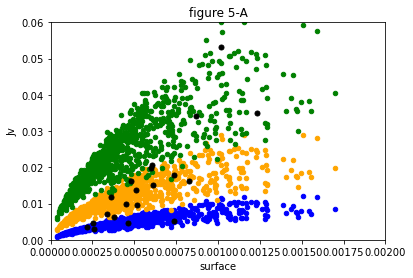

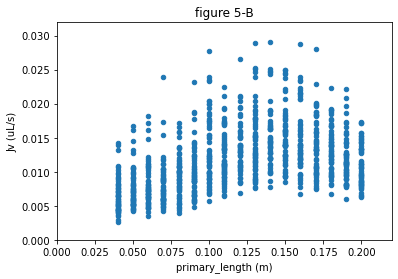

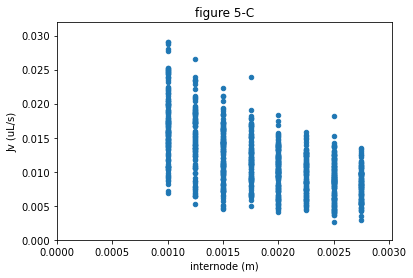

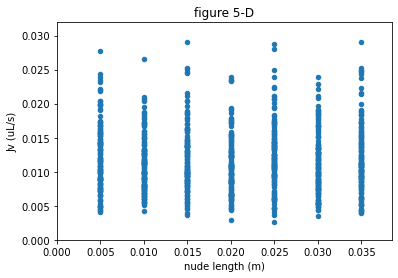

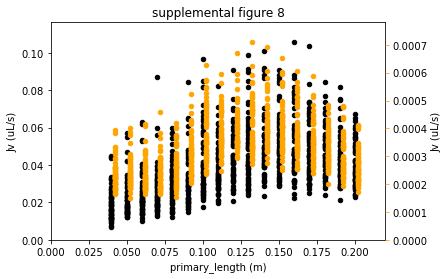

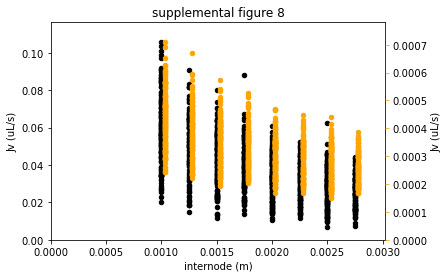

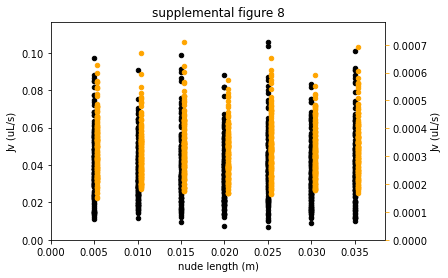

In [16]:
%run simulation_fig-5_sup-fig-8.py parameters_fig-5_sup-fig-8.yml -n 10

### Figure 6-A and supplemental figure 4
- run times: few minutes
- add '-o name_of_results_file.csv' as argument, to save results in a csv file named name_of_results_file.csv

**Remark:** this the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architecture with a given seed than the architectures in Boursiac2022. That may explain results slightly different

Simulation runs:  256
#############################
100

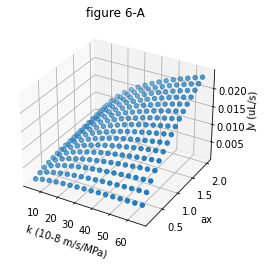

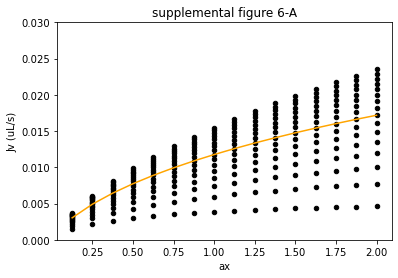

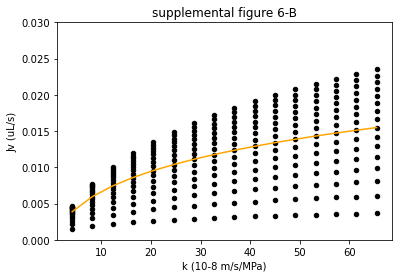

In [8]:
%run simulation_fig-6A_sup-fig-6.py parameters-fig-6A_sup-fig-6.yml

### Figure 6-B and 6-C
- For run time purpose, the results in the saved notebook have been obtained with less ax and k values than for the paper
- run time with these parameters: 30 to 40 minutes
- run time with the full set of roots, ax and k: several hours
- the range of ax and k may be changed in parameters-fig-6-B-C.yml. The k value is changed by the intermediary of the factor radfold
- add '-o name_of_results_file.csv' as argument, to save results in a csv file named name_of_results_file.csv

**Remark:** this is the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022 where results were obtained with a python 2 version. That may explain slightly different results .

Simulation runs:  29750
#############################
fig-6-B: runs done 100.0 %%%running time is  2062.3160173892975


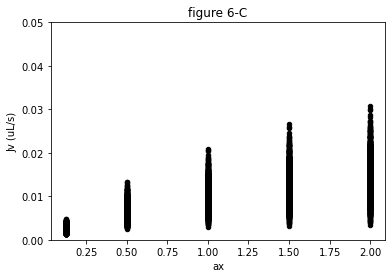

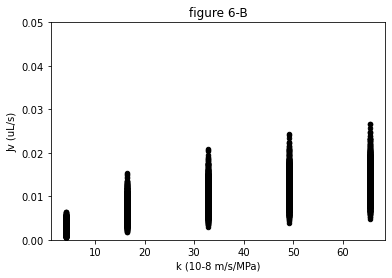

In [5]:
%run simulation_fig-6-B-C.py parameters-fig-6-B-C.yml -o fig-6-C-B.csv

### Figure 6-D
- simulations duration: few minutes

Simulation runs:  20
#############################
figure 6-D
00Simulation runs:  20
#############################
figure 6-D
00

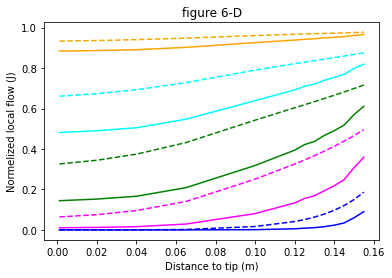

In [29]:
%run simulation_fig-6D.py parameters_fig-6D_sup-fig-7.yml

### Figure 6-E:
- see end of simulation_fig-1B-3C-6E-7B.py to adjust picture size, and visual radius of the root

plant-1.txt 0.125


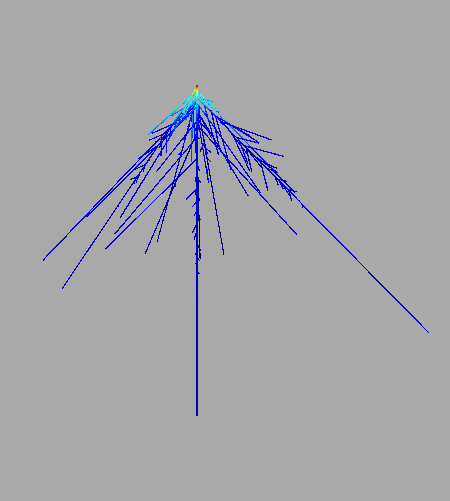

plant-1.txt 1.0


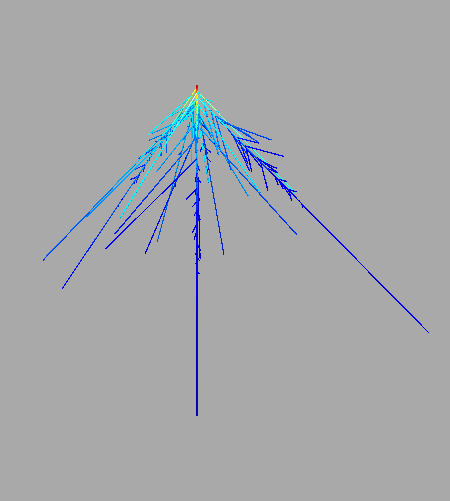

plant-1.txt 2.0


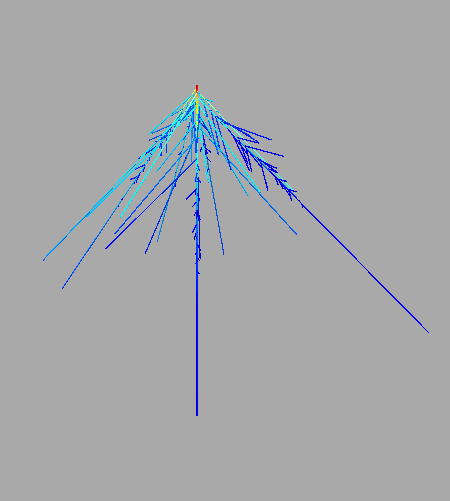

In [34]:
%run simulation_fig-1B-3C-6E-7B.py parameters-fig-6E_sup-fig-4C.yml --prop j

### Figure 7-A

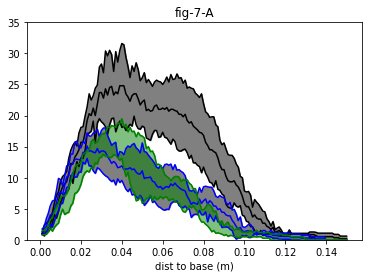

In [35]:
df7a = pd.read_csv("data_figures/fig-7-A.csv", sep = ',')
ax=df7a.plot('dist to base (m)','n Col0',color='black')
df7a.plot('dist to base (m)','95 - Col',color='black',ax=ax)
df7a.plot('dist to base (m)','95 + Col',color='black',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - Col']),list(df7a.loc[:,'95 + Col']), color='grey')
df7a.plot('dist to base (m)','esk1-5',color='blue',ax=ax)
df7a.plot('dist to base (m)','95 - esk1-5',color='blue',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-5',color='blue',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-5']),list(df7a.loc[:,'95 + esk1-5']), color='grey')
df7a.plot('dist to base (m)','95 - esk1-1',color='green',ax=ax)
df7a.plot('dist to base (m)','95 + esk1-1',color='green',ax=ax)
ax.fill_between(list(df7a.loc[:,'dist to base (m)']),list(df7a.loc[:,'95 - esk1-1']),list(df7a.loc[:,'95 + esk1-1']), color='green', alpha=0.5)
ax.set_title('fig-7-A')
ax.set_ylim(0,35.0)
ax.legend().remove()

### Figure 7-B

plant-1.txt 1.0


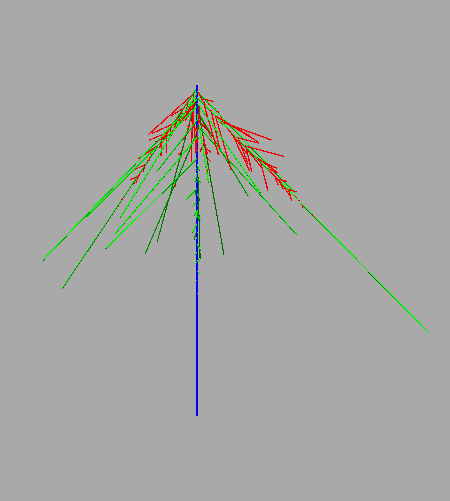

20-07-02-SD-150218-esk11-7.txt 1.0


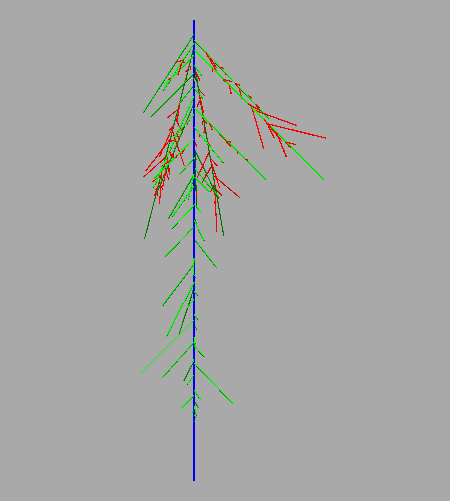

20-06-09-FB-180719-e15ch1-1.txt 1.0


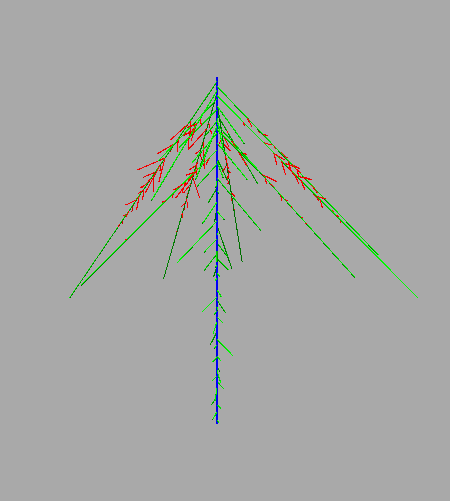

<Figure size 432x288 with 0 Axes>

In [36]:
%run simulation_fig-1B-3C-6E-7B.py parameters_fig-7B.yml --prop order

### Figure 7-C:
- because the run time that may be high the whole set of adjustment in this notebook is not propose
- instead the final results is display from a csv file
- however the user may reproduce them by changing the input_file name in parameters_fig-2-B.yml keeping the same initial guesses for k and K. These files are located in the folder data and contain the following strings: 200619-ybfb-e11-2, 200703-ybfb-e11-3, 200721-ybfb-e11-2, 200724-ybfb-e11-2, 200812-ybfb-e11-3, 200619-ybfb-e15-1, 200619-ybfb-e15-2, 200703-ybfb-e15-3, 200721-ybfb-e15-1, 200721-ybfb-e15-2, 200812-ybfb-e15-1, 200812-ybfb-e15-3

Text(0.5, 1.0, 'fig-7-C')

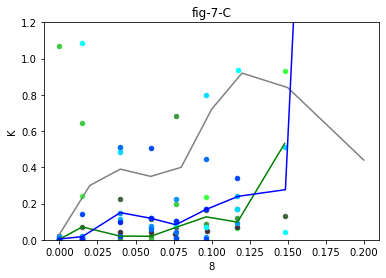

In [37]:
ax = draw.plot('x K median', 'mediancurve from cut and flow measurements',color='grey')
draw2 = pd.read_csv("data_figures/fig_7-C-e11.csv", sep = ',', dtype = float)
draw2.plot('x', 'median-esk1-1',color = 'green',ax=ax)
for i in range(0,10,2):
    color = (0.25,1.0-float(i)/10.0,0.25)
    draw2.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
draw3 = pd.read_csv("data_figures/fig_7-C-e15.csv", sep = ',', dtype = float)
draw3.plot('x', 'median esk1-5',color ='blue',ax=ax)
for i in range(0,14,2):
    color = (0.,1.0-float(i)/14.0,1.)
    draw3.plot.scatter(i,i+1, ax = ax, color = color, edgecolor = color)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_ylim(0,1.2)
ax.set_title('fig-7-C')

### Figure 7-D

Text(0.5, 1.0, 'fig-7-D')

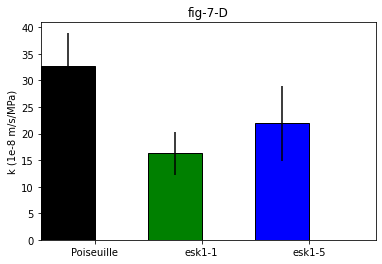

In [38]:
barwidth = 0.4
cut_n_flow = [9.86, 47.68, 71.43, 21.97, 60.15, 34.16, 10.19, 23.42, 26.62, 22.17]
se1 = np.std(cut_n_flow)/np.sqrt(len(cut_n_flow))
esk11 = [10.9, 33.6, 16.6, 10.2, 10]
se3 = np.std(esk11)/np.sqrt(len(esk11))
esk15 = [11.1, 12.7, 39.5, 9.82, 10.1, 9.69, 60.5]
se4 = np.std(esk15)/np.sqrt(len(esk15))
plt.bar(0.2, np.mean(cut_n_flow), width = barwidth, color = 'black', edgecolor = 'black', yerr=se1, label = 'cut_n_flow')
plt.bar(1.0, np.mean(esk11), width = barwidth, color = 'green', edgecolor = 'black', yerr=se3, label = 'esk1-1')
plt.bar(1.8, np.mean(esk15), width = barwidth, color = 'blue', edgecolor = 'black', yerr=se4, label = 'esk1-5')
plt.xlim(0,2.5)
plt.xticks([0.4, 1.2, 2.0], ['Poiseuille', 'esk1-1', 'esk1-5'])
plt.ylabel('k (1e-8 m/s/MPa)')
plt.title('fig-7-D')

### Supplemental Figure 1-B

Text(0.5, 1.0, 'supplemental fig-1 B')

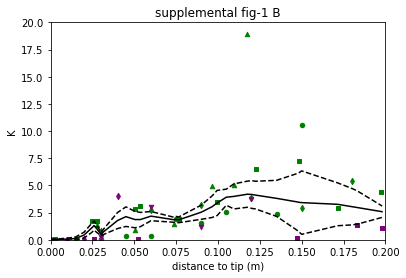

In [22]:
df1c = pd.read_csv("data_figures/sup-fig-1-C.csv", sep = ',', dtype = float)
marker = ['o','s','^','d','s','d','v']
colors = ['green','green','green','green','purple','purple','purple']
ax = df1c.plot('X lowess','K lowess', color='black')
df1c.plot('X lowess', 'SE -',color='black',style='--',ax=ax)
df1c.plot('X lowess', 'SE +',color='black',style='--',ax=ax)
n=0
for i in range(0,21,3):
    df1c.plot.scatter(i,i+1,marker=marker[n],color=colors[n],edgecolor =colors[n],ax=ax)
    n+=1
ax.set_xlim(0,0.2)
ax.set_ylim(0,20)
ax.get_legend().remove()
ax.set_ylabel('K')
ax.set_xlabel('distance to tip (m)')
ax.set_title('supplemental fig-1 B')

### Supplemental Figure 3

- This figure shows 5 adjustments
- only the results are reproduced
- to perform the whole adjustment set just use the following command line ''%run adjustment_K_and_k.py parameters_fig-3.yml -op' with the different initial guesses for K in parameters_fig-3.yml (see the yaml file with K initial = 0.1 $10^{-12} m^4.s^{-1}.MPa^{-1}$ for example).

Text(0.5, 0, 'Dist. to tip (m)')

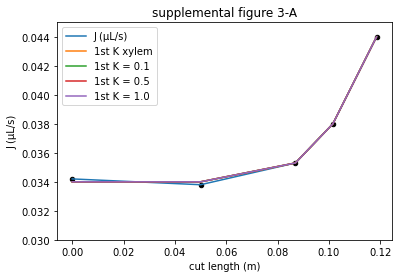

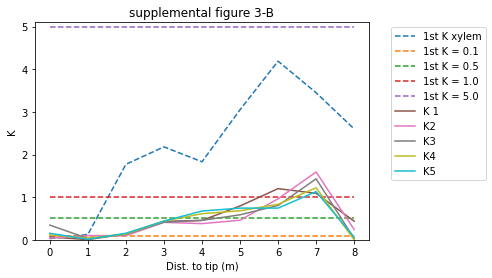

In [23]:
dsf2a = pd.read_csv("data_figures/sup-fig-3-A.csv", sep = ',', dtype = float)
ax = dsf2a.plot.scatter(0,1,color='black')
for i in range(1,6):
    dsf2a.plot(0,i, ax=ax)
ax.set_ylim(0.03,0.045)
ax.set_title('supplemental figure 3-A')
dsf2b = pd.read_csv("data_figures/sup-fig-3-B.csv", sep = ',', dtype = float)
ax2 = dsf2b.iloc[:,range(1,10,2)].plot(style='--')
dsf2b.iloc[:,range(2,11,2)].plot(ax=ax2)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_ylim(0,5.1)
ax2.set_title('supplemental figure 3-B')
ax2.set_ylabel('K')
ax2.set_xlabel('Dist. to tip (m)')

### Supplemental Figure 4 C
the figures are not shown from the same side, to see the representation from the same direction run the script from a console with the last lines about viewer commented, and then rotate by 180.

('plant-01.txt', 0.125)


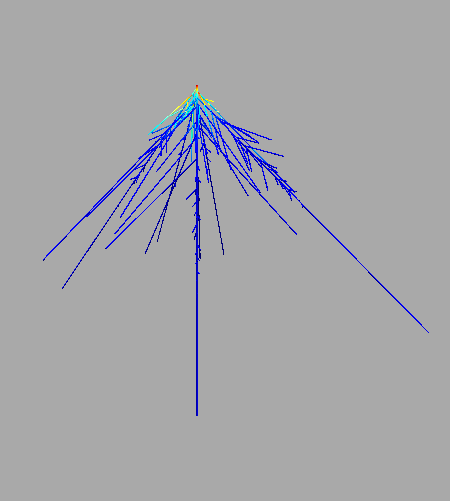

('plant-01.txt', 1.0)


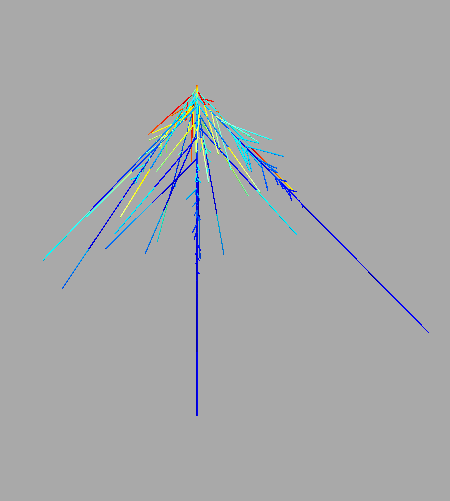

('plant-01.txt', 2.0)


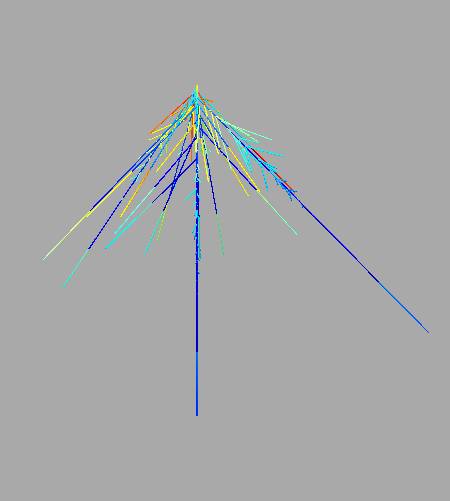

In [13]:
%run simulation_sup-fig-4C.py parameters-fig-6E_sup-fig-4C.yml

### Supplemental Figure 5

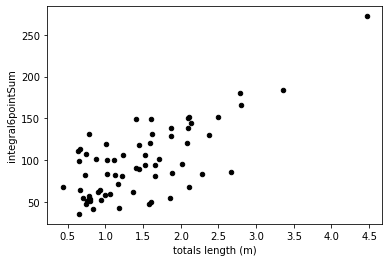

In [26]:
dfs3a = pd.read_csv("data_figures/sup-fig-5-A.csv", sep = ',')
ax=dfs3a.plot.scatter('totals length (m)','integral6pointSum',color='black')

**Supplemental Figure 5 B**

**Remark:** this is the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022 where results were obtained with a python 2 version. That may explain slightly different results .

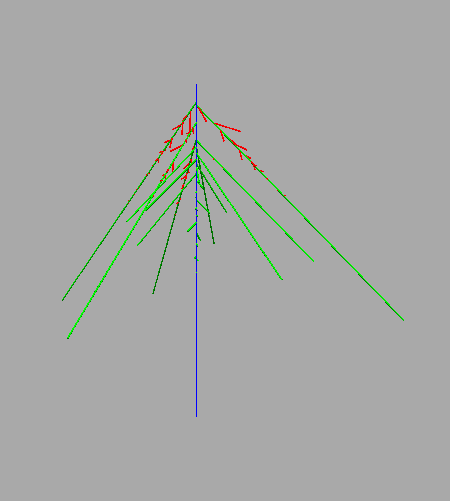

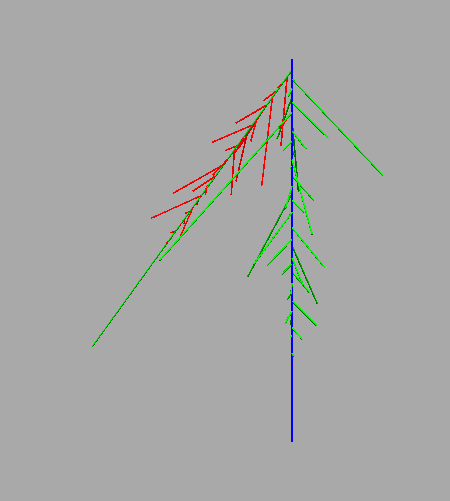

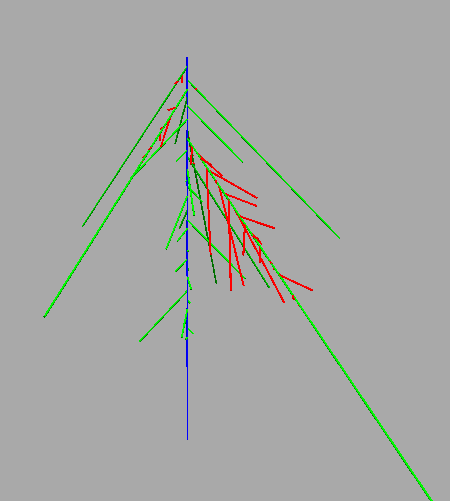

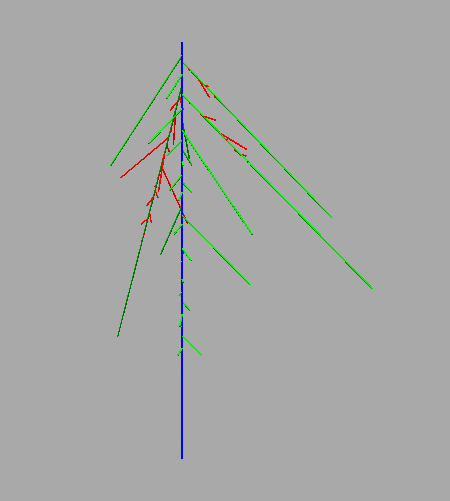

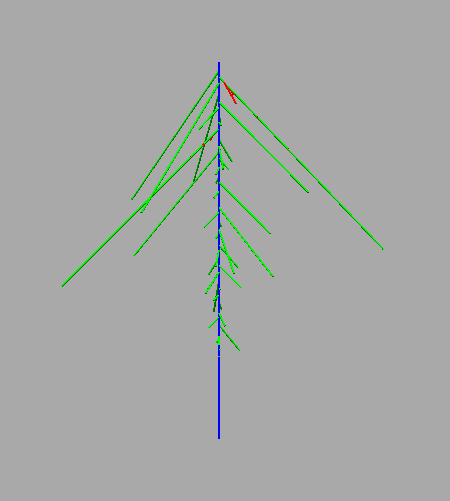

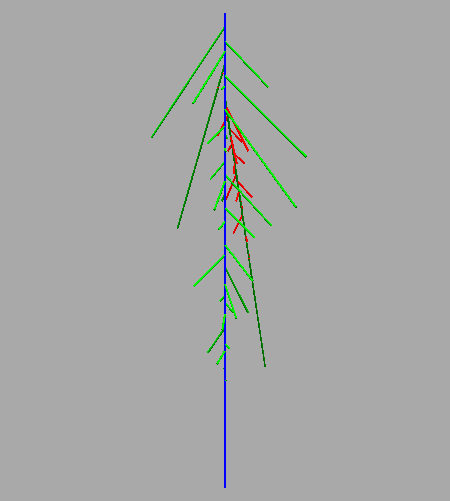

In [27]:
%run simulation_sup_fig-5-B.py parameters-sup-fig-5-B.yml

### supplemental figure 7
- here the figures are from generated architectures for a given seed, see remarks below
- sup. fig. 7 A:
    - architecture slightly different, see remarks below
- sup. fig. 7 B:
    - for run time purpose: short subset
    - run time with short_subset_generated-roots-20-10-07_PR_016.csv: 10 minutes
    - run time with subset_generated-roots-20-10-07_PR_016.csv: at least one hour

**Remark:** this is the python 3 HydroRoot version, unfortunately its generator uses random.randint() that is known to give different results with the same seed between python 2 and 3 (see for instance this __[issue](https://github.com/python/cpython/issues/53271)__). Therefore, that python 3 notebook cannot reproduce exactly the same architectures with a given seed than the architectures in Boursiac2022 where results were obtained with a python 2 version. That may explain slightly different results .

Simulation runs:  1120
#############################
29.11 %%% ax =  0.7499999999999998


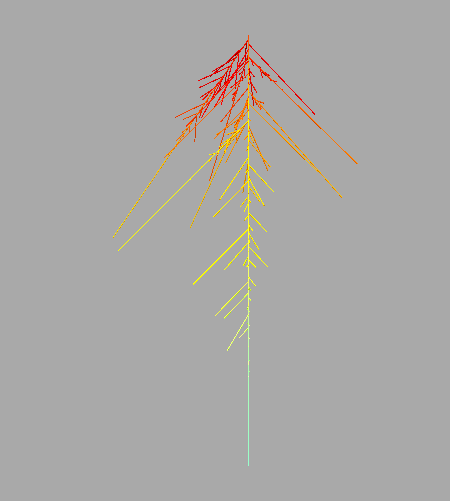

29.55 % ax =  0.49999999999999956


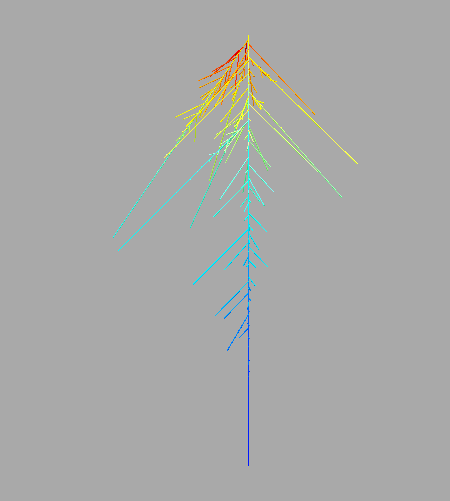

30.0 %% ax =  0.24999999999999933


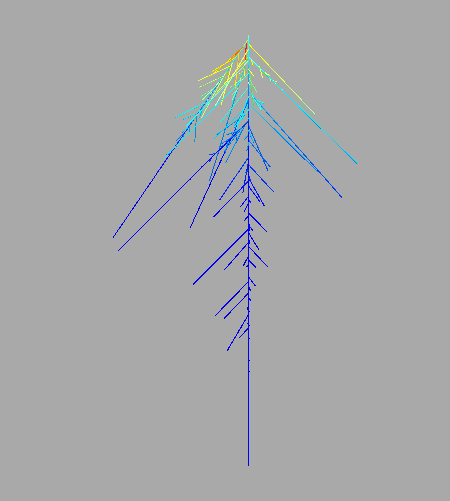

30.36 % ax =  0.049999999999999156


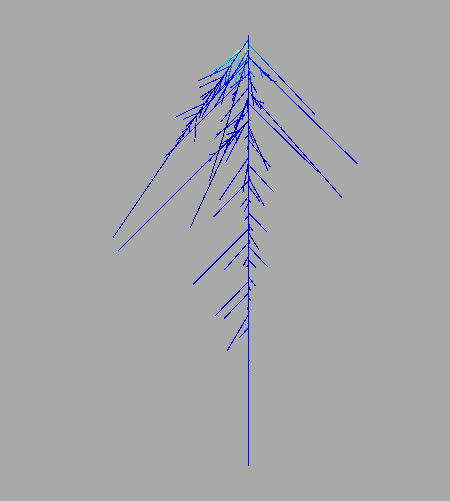

100.0 %running time is  316.3976697921753


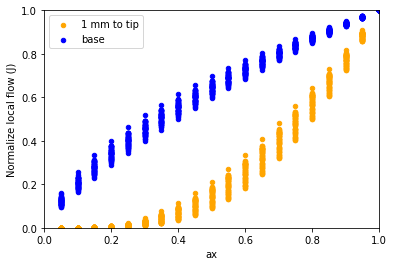

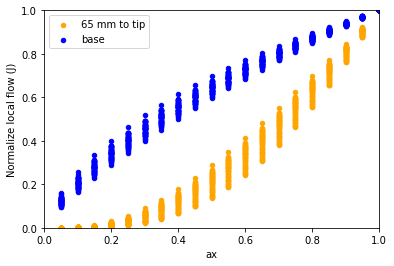

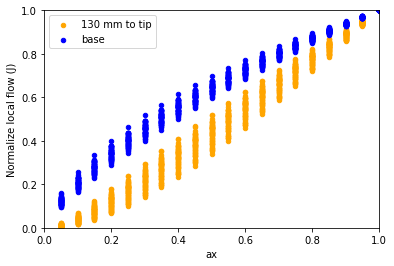

In [12]:
%run simulation_sup-fig-7.py parameters_fig-6D_sup-fig-7.yml